In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
penguin_df = sns.load_dataset("penguins")
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Rango

In [ ]:
maximos = penguin_df.max(numeric_only=True)
maximos

In [ ]:
minimos = penguin_df.min(numeric_only=True)
minimos

In [ ]:
rangos = maximos - minimos
rangos

# Desviación Standar (STD)

In [ ]:
stds = penguin_df.std(numeric_only=True)
stds

# Rango Intercuartílico (IQR)

In [ ]:
q1 = penguin_df.quantile(0.25, numeric_only=True)
q3 = penguin_df.quantile(0.75, numeric_only=True)
print(q1)
print(q3)

In [18]:
(
    penguin_df
      .quantile(q=[0.25,0.5,0.75], numeric_only=True)
      .transpose()
      .rename_axis("variable")
      .reset_index()
      .assign(
          iqr = lambda df: df[0.75] - df[0.25]
      )
)

,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.225,44.45,48.5,9.275
1,bill_depth_mm,15.600,17.30,18.7,3.100
2,flipper_length_mm,190.000,197.00,213.0,23.000
3,body_mass_g,3550.000,4050.00,4750.0,1200.000


# Graficamos Medidas de Dispersión

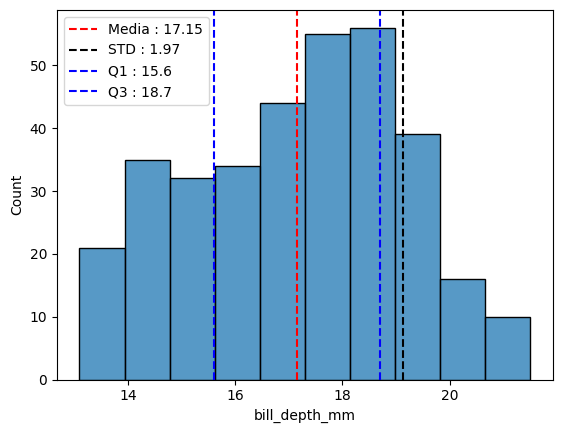

In [37]:
sns.histplot(data=penguin_df, x="bill_depth_mm")

bill_mean = round(penguin_df.bill_depth_mm.mean(),2)
bill_std = bill_mean + penguin_df.bill_depth_mm.std()
bill_q1 = penguin_df.bill_depth_mm.quantile(0.25)
bill_q3 = penguin_df.bill_depth_mm.quantile(0.75)

plt.axvline(
    x=bill_mean,
    color="red",
    linestyle="dashed",
    label=f"Media : {bill_mean}"
)
plt.axvline(
    x=bill_std,
    color="black",
    linestyle="dashed",
    label=f"STD : {round(penguin_df.bill_depth_mm.std(), 2)}"
)
plt.axvline(
    x=bill_q1,
        color="blue",
    linestyle="dashed",
    label=f"Q1 : {round(bill_q1, 2)}"
)
plt.axvline(
    x=bill_q3,
    color="blue",
    linestyle="dashed",
    label=f"Q3 : {round(bill_q3, 2)}"
)
plt.legend()
plt.show()

# Boxplot (IQR)

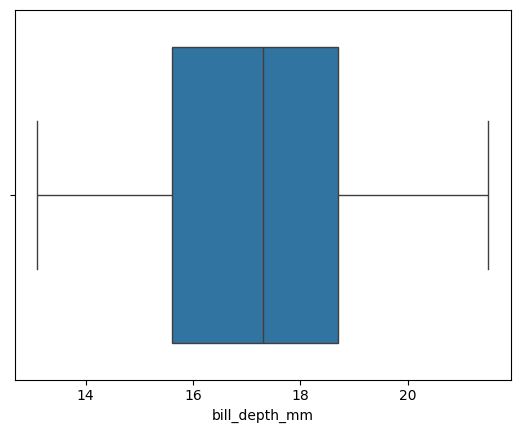

In [34]:
sns.boxplot(data=penguin_df, x="bill_depth_mm")
plt.show()